# Part B

**Zhou Wei U2022264K**

In [1]:
# Setting the seed here is sufficient. 
# If you don't plan to use these starter code, make sure you add this cell.

SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization, StringLookup, IntegerLookup

In [3]:
import pandas as pd
df = pd.read_csv('hdb_price_prediction.csv')
df

,month,year,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133407,6,2022,877 YISHUN STREET 81,Khatib,0.475885,12.738721,0.016807,0.000968,"EXECUTIVE, Maisonette",64.583333,145.0,07 TO 09,810000.0
133408,1,2022,633 YISHUN STREET 61,Khatib,0.774113,13.229106,0.016807,0.000968,"MULTI-GENERATION, Multi Generation",65.000000,164.0,04 TO 06,785000.0
133409,2,2022,633 YISHUN STREET 61,Khatib,0.774113,13.229106,0.016807,0.000968,"MULTI-GENERATION, Multi Generation",64.916667,171.0,04 TO 06,842000.0
133410,2,2022,632 YISHUN STREET 61,Khatib,0.700595,13.222912,0.016807,0.000968,"MULTI-GENERATION, Multi Generation",64.750000,164.0,10 TO 12,845000.0


In [4]:
# Drop features not used for modelling
df.drop(columns=['full_address', 'nearest_stn'], inplace=True)
df

,month,year,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
133407,6,2022,0.475885,12.738721,0.016807,0.000968,"EXECUTIVE, Maisonette",64.583333,145.0,07 TO 09,810000.0
133408,1,2022,0.774113,13.229106,0.016807,0.000968,"MULTI-GENERATION, Multi Generation",65.000000,164.0,04 TO 06,785000.0
133409,2,2022,0.774113,13.229106,0.016807,0.000968,"MULTI-GENERATION, Multi Generation",64.916667,171.0,04 TO 06,842000.0
133410,2,2022,0.700595,13.222912,0.016807,0.000968,"MULTI-GENERATION, Multi Generation",64.750000,164.0,10 TO 12,845000.0


In [5]:
# The functions in this cell are adapted from https://keras.io/examples/structured_data/structured_data_classification_from_scratch/
# It is the same link as the one mentioned in the question paper (Q1b)

# Generate tf.data.Dataset objects from dataframe
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("resale_price")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

# To apply featurewise normalization to numerical features
def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature

# If string categorical, to first turn string inputs into integer indices, then one-hot encode these integer indices 
# If integer categorical, to one-hot encode integer categorical features
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary") # NOTE: as mentioned in the question paper, this actually does one-hot encoding. You could replace 'binary' with 'one_hot' if you wish to.

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [6]:
from keras import backend as K

def r2(y_true, y_pred): 
    '''
    # Obtained from https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
    '''
    SS_res = K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Question 1

### a)

In [7]:
# Split data
train_dataframe = df[df['year']<=2020].copy()
val_dataframe = df[df['year']>2020].copy()

del train_dataframe['year']
del val_dataframe['year']

train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

train_ds = train_ds.batch(256)
val_ds = val_ds.batch(256)

The LTV ration were lowered from 90% to 85% on 16 Dec 2021 and investigatation on whether the change in LTV ratio has made an impact on the model previously developed by a team of data scientists was carried out. As such, train and test sets were split to 2020 and before and after 2020. Random train/test splits is not used to prevent the model from learning about the features of the test set which contains entries after the change in LTV ratio.

### b)

In [8]:
# Build a model
# Categorical features encoded as integers
month = keras.Input(shape=(1,), name="month", dtype="int64")

# Categorical feature encoded as string
flat_model_type = keras.Input(shape=(1,), name="flat_model_type", dtype="string")
storey_range = keras.Input(shape=(1,), name="storey_range", dtype="string")

# Numerical features
dist_to_nearest_stn = keras.Input(shape=(1,), name="dist_to_nearest_stn")
dist_to_dhoby = keras.Input(shape=(1,), name="dist_to_dhoby")
degree_centrality = keras.Input(shape=(1,), name="degree_centrality")
eigenvector_centrality = keras.Input(shape=(1,), name="eigenvector_centrality")
remaining_lease_years = keras.Input(shape=(1,), name="remaining_lease_years")
floor_area_sqm = keras.Input(shape=(1,), name="floor_area_sqm")

all_inputs = [
    month,
    flat_model_type,
    storey_range,
    dist_to_nearest_stn,
    dist_to_dhoby,
    degree_centrality,
    eigenvector_centrality,
    remaining_lease_years,
    floor_area_sqm
]

# Integer categorical features
month_encoded = encode_categorical_feature(month, "month", train_ds, False)

# String categorical features
flat_model_type_encoded = encode_categorical_feature(flat_model_type, "flat_model_type", train_ds, True)
storey_range_encoded = encode_categorical_feature(storey_range, "storey_range", train_ds, True)

# Numerical features
dist_to_nearest_stn_encoded = encode_numerical_feature(dist_to_nearest_stn, "dist_to_nearest_stn", train_ds)
dist_to_dhoby_encoded = encode_numerical_feature(dist_to_dhoby, "dist_to_dhoby", train_ds)
degree_centrality_encoded = encode_numerical_feature(degree_centrality, "degree_centrality", train_ds)
eigenvector_centrality_encoded = encode_numerical_feature(eigenvector_centrality, "eigenvector_centrality", train_ds)
remaining_lease_years_encoded = encode_numerical_feature(remaining_lease_years, "remaining_lease_years", train_ds)
floor_area_sqm_encoded = encode_numerical_feature(floor_area_sqm, "floor_area_sqm", train_ds)

all_features = layers.concatenate(
    [
        month_encoded,
        flat_model_type_encoded,
        storey_range_encoded,
        dist_to_nearest_stn_encoded,
        dist_to_dhoby_encoded,
        degree_centrality_encoded,
        eigenvector_centrality_encoded,
        remaining_lease_years_encoded,
        floor_area_sqm_encoded
    ]
)

output = layers.Dense(1, activation="linear")(all_features)
model = keras.Model(all_inputs, output)

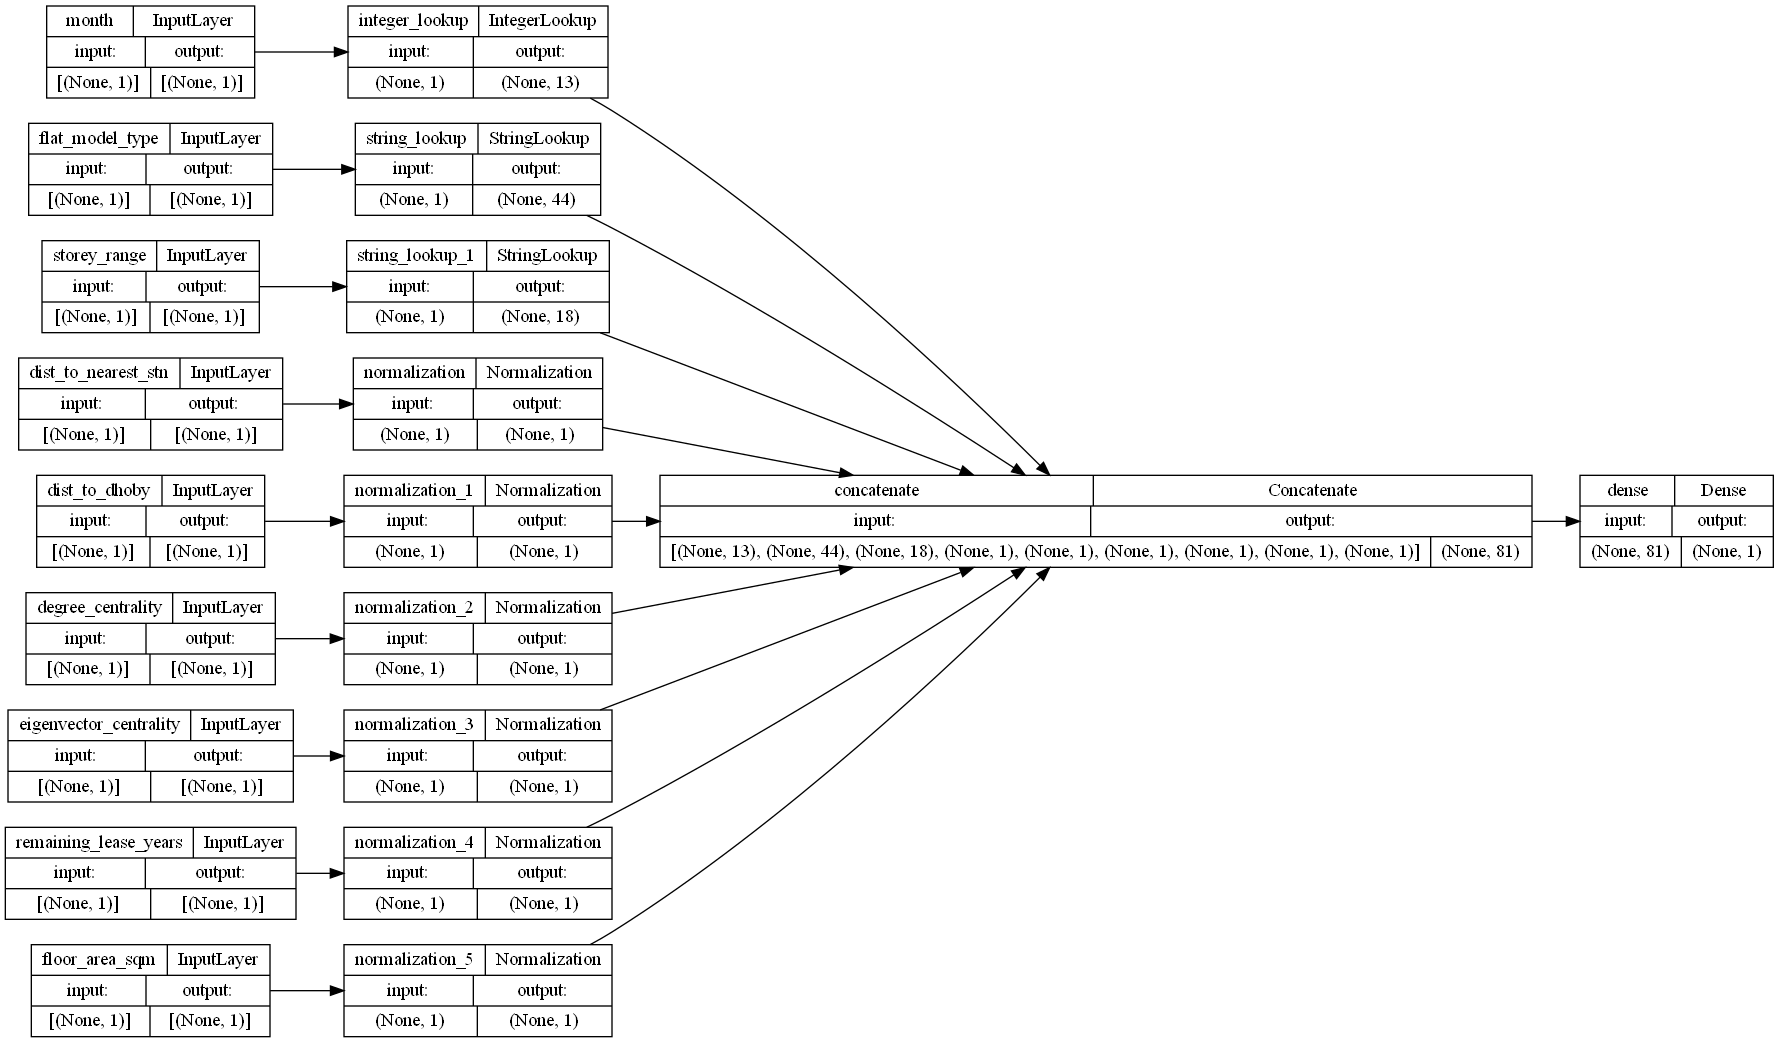

In [9]:
# Visualize our connectivity graph
# `rankdir='LR'` is to make the graph horizontal.
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, rankdir="LR")

### c)

In [10]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=[r2])
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
342/342 [==============================] - 6s 11ms/step - loss: 219586035712.0000 - r2: -8.3474 - val_loss: 301486866432.0000 - val_r2: -10.0832
Epoch 2/50
342/342 [==============================] - 4s 10ms/step - loss: 219584692224.0000 - r2: -8.3520 - val_loss: 301485260800.0000 - val_r2: -10.0722
Epoch 3/50
342/342 [==============================] - 4s 10ms/step - loss: 219583266816.0000 - r2: -8.3501 - val_loss: 301483655168.0000 - val_r2: -10.1026
Epoch 4/50
342/342 [==============================] - 4s 9ms/step - loss: 219582005248.0000 - r2: -8.3437 - val_loss: 301482082304.0000 - val_r2: -10.0800
Epoch 5/50
342/342 [==============================] - 4s 9ms/step - loss: 219580710912.0000 - r2: -8.3458 - val_loss: 301480443904.0000 - val_r2: -10.1214
Epoch 6/50
342/342 [==============================] - 4s 9ms/step - loss: 219579482112.0000 - r2: -8.3513 - val_loss: 301478969344.0000 - val_r2: -10.0838
Epoch 7/50
342/342 [==============================] - 4s 9ms/step -

In [11]:
print("Test R2 value with Adam optimiser: %f" % (history.history['val_r2'][-1]))

Test R2 value with Adam optimiser: -10.073886


In [12]:
output = layers.Dense(1, activation="linear")(all_features)
model = keras.Model(all_inputs, output)
model.compile(tf.keras.optimizers.SGD(learning_rate=0.01), loss="mse", metrics=[r2])
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
342/342 [==============================] - 5s 11ms/step - loss: 18728708096.0000 - r2: 0.1966 - val_loss: 13789993984.0000 - val_r2: 0.4958
Epoch 2/50
342/342 [==============================] - 4s 9ms/step - loss: 5481923584.0000 - r2: 0.7678 - val_loss: 12796295168.0000 - val_r2: 0.5320
Epoch 3/50
342/342 [==============================] - 4s 9ms/step - loss: 5026647552.0000 - r2: 0.7875 - val_loss: 12325084160.0000 - val_r2: 0.5501
Epoch 4/50
342/342 [==============================] - 4s 8ms/step - loss: 4776961536.0000 - r2: 0.7976 - val_loss: 12102076416.0000 - val_r2: 0.5574
Epoch 5/50
342/342 [==============================] - 3s 8ms/step - loss: 4609033728.0000 - r2: 0.8049 - val_loss: 11926616064.0000 - val_r2: 0.5641
Epoch 6/50
342/342 [==============================] - 4s 9ms/step - loss: 4482668032.0000 - r2: 0.8106 - val_loss: 11662400512.0000 - val_r2: 0.5736
Epoch 7/50
342/342 [==============================] - 4s 9ms/step - loss: 4384753664.0000 - r2: 0.8140 -

In [13]:
print("Test R2 value with SGD optimiser: %f" % (history.history['val_r2'][-1]))

Test R2 value with SGD optimiser: 0.610094


After changing the optimiser from Adam to SGD, the test R2 value increased from -10.073886 to 0.610094. 

Adam optimisation is an adaptive optimiser. It is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments of the gradients. SGD optimisation is a gradient descent (with momentum) optimiser. It is an iterative method for optimising an objective function with suitable smoothness properties that is either differentiable or subdifferentiable. 

From the outputs above, the training loss of Adam decreased slightly whereas the training loss of SGD converged with the number of epochs. This could be due to the default learning rate of Adam being too small for effective convergence, which made it to fail to find the right path and converge to a suboptimal point. 

SGD also gave a higher R2 value because it generalises better than Adam. The non-uniform scaling of the gradients in Adam may lead to poor generalisation performance. On the other hand, SGD is uniformly scaled. With low training error, SGD can generalize well. 

In general, adaptive gradient algorithms tend to converge to sharp minima and usually generalizes poorly, while SGD prefers to find flat minima and thus generalises better with the latter taking a longer time to converge. Hence, better generalisation of SGD as compared to Adam led to significant improvement in the test R2 value.

### d)

In [14]:
hidden = layers.Dense(10, activation="relu")(all_features)
output = layers.Dense(1, activation="linear")(hidden)
model = keras.Model(all_inputs, output)

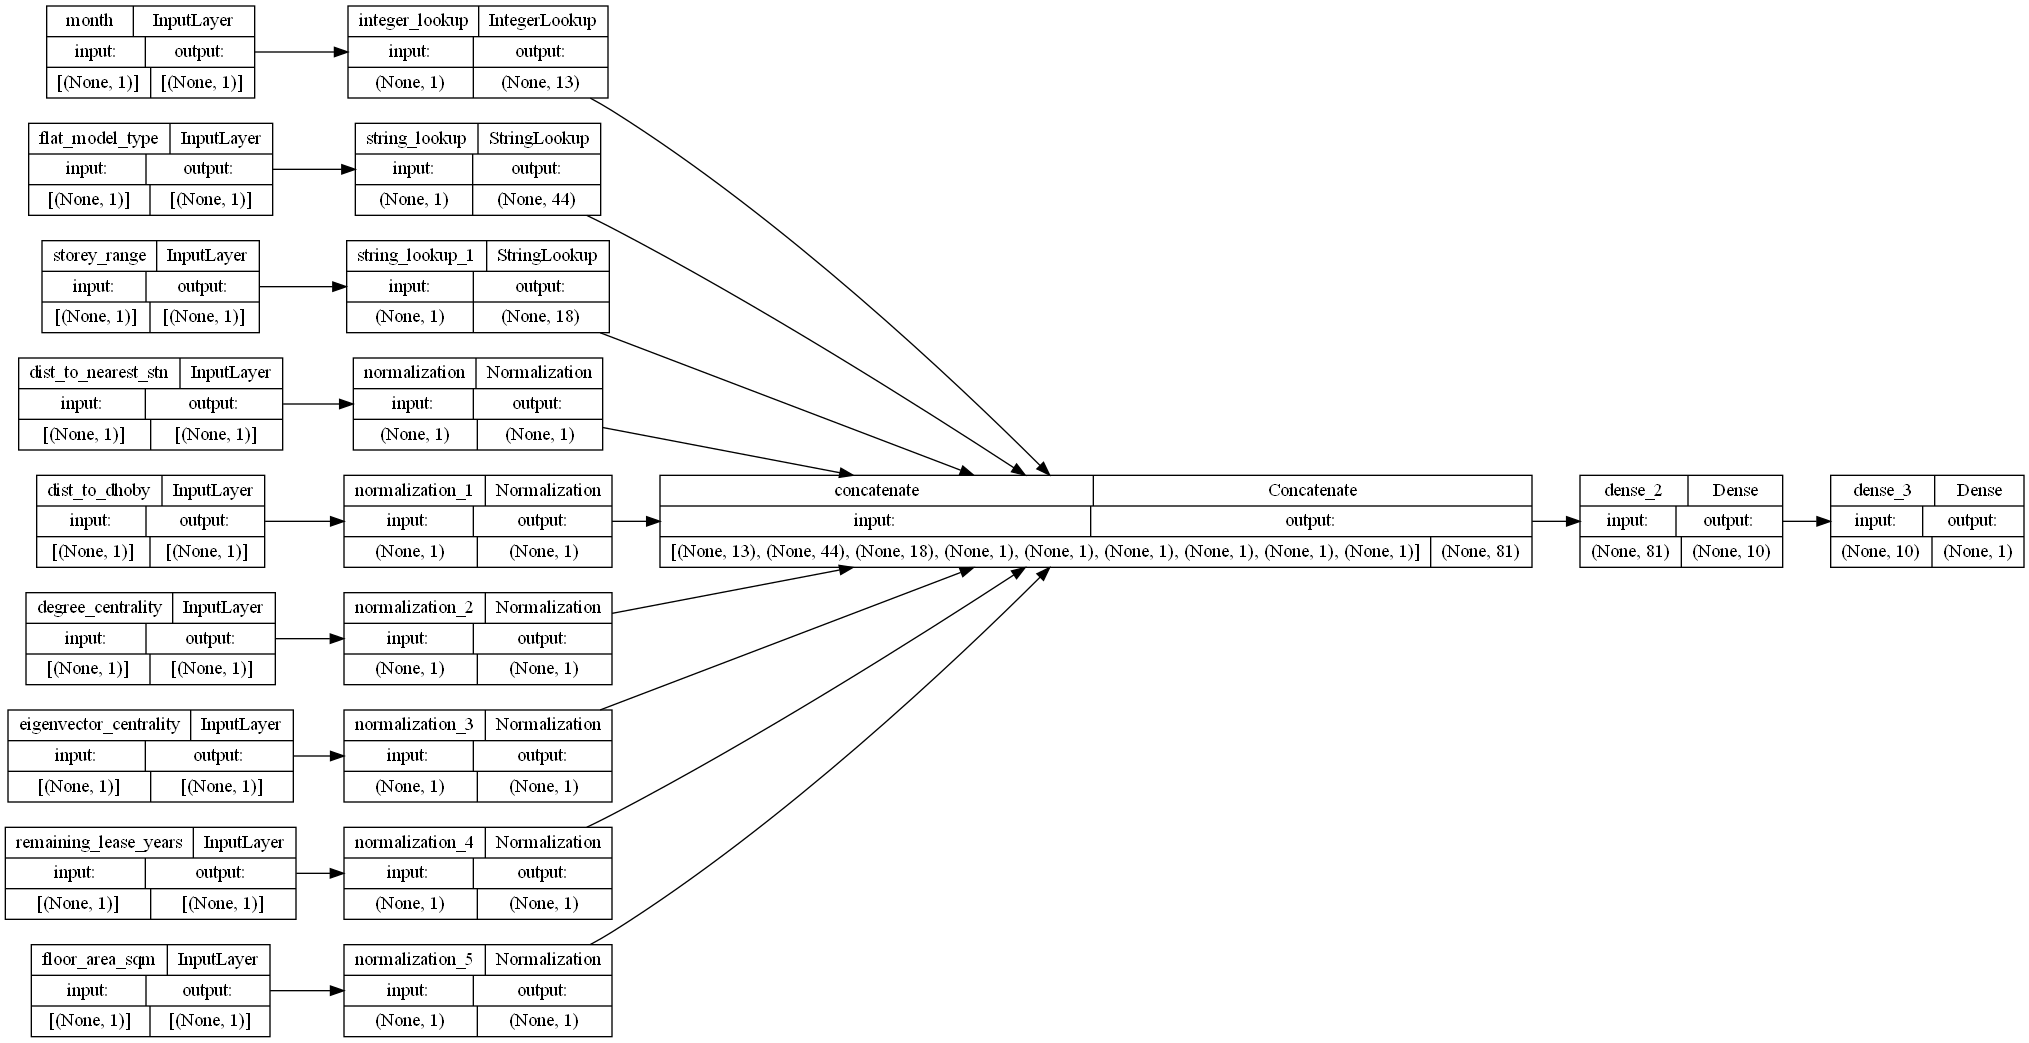

In [15]:
plot_model(model, show_shapes=True, rankdir="LR")

In [16]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.08), loss='mse', metrics=[r2])
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
342/342 [==============================] - 6s 12ms/step - loss: 198910525440.0000 - r2: -7.4590 - val_loss: 226230353920.0000 - val_r2: -7.3223
Epoch 2/50
342/342 [==============================] - 4s 11ms/step - loss: 99243499520.0000 - r2: -3.2280 - val_loss: 88375246848.0000 - val_r2: -2.2502
Epoch 3/50
342/342 [==============================] - 5s 13ms/step - loss: 23092916224.0000 - r2: 0.0186 - val_loss: 25462859776.0000 - val_r2: 0.0687
Epoch 4/50
342/342 [==============================] - 4s 11ms/step - loss: 6386566656.0000 - r2: 0.7301 - val_loss: 14037758976.0000 - val_r2: 0.4876
Epoch 5/50
342/342 [==============================] - 4s 11ms/step - loss: 5093343232.0000 - r2: 0.7846 - val_loss: 12455603200.0000 - val_r2: 0.5450
Epoch 6/50
342/342 [==============================] - 5s 12ms/step - loss: 4750267392.0000 - r2: 0.7990 - val_loss: 12000121856.0000 - val_r2: 0.5619
Epoch 7/50
342/342 [==============================] - 4s 11ms/step - loss: 4490898944.0000 

In [17]:
print("Test R2 value with hidden layer: %f" % (history.history['val_r2'][-1]))

Test R2 value with hidden layer: 0.652046


The test R2 value with the hidden layer added is 0.652046.

### e) 

Comparing the performance of the 3 models, the NN architecture model performed significantly better with a R2 value of 0.652046 as compared to 0.627 of the linear regression model and 0.610094 of the (SGD variant) Dense layer model. 

Firstly, the NN model performed better than the linear regression model because it can deal with nonlinearities better. Linear regression requires the features and the target to have a linear relationship and is limited to handling linearities. On the other hand, NN can deal with both linearities and nonlinearities. Due to some nonlinear dependencies in the training set such as month and resale price, NN performed better than linear regression.

Secondly, the NN model performed better than the Dense layer model because it has a deeper network. Deep networks extract features at different levels of complexity for regression or classification. Deep networks can learn complex mapping accurately if sufficient training data is available. With an additional layer, NN can learn features at various levels of abstraction and 
be better at generalising than Dense layer by learning the intermediate features between the features and the target.

## Question 2

### a)

In [18]:
# Split data
train_dataframe = df[df['year']<2020].copy()
val_dataframe = df[df['year']==2020].copy()

del train_dataframe['year']
del val_dataframe['year']

train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

train_ds = train_ds.batch(256)
val_ds = val_ds.batch(256)

### b)

In [19]:
from tensorflow.keras.layers import Embedding
from math import floor

def embed_categorical_feature(feature, name, dataset, is_string, divisor):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="int") # NOTE: as mentioned in the question paper, this actually does one-hot encoding. You could replace 'binary' with 'one_hot' if you wish to.

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)
    
    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    
    num_categories = len(lookup.get_vocabulary())
    embedded_feature = Embedding(num_categories, floor(num_categories//divisor))(encoded_feature)
    return embedded_feature

In [20]:
from tensorflow.keras.layers import Flatten

def build_model(hp):
    divisor = hp.Int('divisor', min_value=1, max_value=2, step=1)
    
    # Integer categorical features
    month_encoded = embed_categorical_feature(month, "month", train_ds, False, divisor)
    month_encoded = Flatten()(month_encoded)

    # String categorical features
    flat_model_type_encoded = embed_categorical_feature(flat_model_type, "flat_model_type", train_ds, True, divisor)
    flat_model_type_encoded = Flatten()(flat_model_type_encoded)
    storey_range_encoded = embed_categorical_feature(storey_range, "storey_range", train_ds, True, divisor)
    storey_range_encoded = Flatten()(storey_range_encoded)

    # Numerical features
    dist_to_nearest_stn_encoded = encode_numerical_feature(dist_to_nearest_stn, "dist_to_nearest_stn", train_ds)
    dist_to_dhoby_encoded = encode_numerical_feature(dist_to_dhoby, "dist_to_dhoby", train_ds)
    degree_centrality_encoded = encode_numerical_feature(degree_centrality, "degree_centrality", train_ds)
    eigenvector_centrality_encoded = encode_numerical_feature(eigenvector_centrality, "eigenvector_centrality", train_ds)
    remaining_lease_years_encoded = encode_numerical_feature(remaining_lease_years, "remaining_lease_years", train_ds)
    floor_area_sqm_encoded = encode_numerical_feature(floor_area_sqm, "floor_area_sqm", train_ds)

    all_features = layers.concatenate(
        [
            month_encoded,
            flat_model_type_encoded,
            storey_range_encoded,
            dist_to_nearest_stn_encoded,
            dist_to_dhoby_encoded,
            degree_centrality_encoded,
            eigenvector_centrality_encoded,
            remaining_lease_years_encoded,
            floor_area_sqm_encoded
        ]
    )   

    hidden = tf.keras.layers.Dense(
        units=hp.Int('units', 4, 32, step=4),
        activation='relu')(all_features)
    output = layers.Dense(1, activation="linear")(hidden)
    model = keras.Model(all_inputs, output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', 1e-4, 2e-1, sampling='log')),
        loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'), r2])
    return model

### c)

In [21]:
import keras_tuner
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10)

In [22]:
tuner.search(train_ds, epochs=50, validation_data=val_ds, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])
best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

print(f"""The hyperparameter search is complete.
The optimal number of units in the hidden layer is {best_hyperparameters.get('units')}, 
the optimal learning rate for the optimiser is {best_hyperparameters.get('learning_rate')} 
and the optimal divisor size is {best_hyperparameters.get('divisor')}.""")

Trial 10 Complete [00h 02m 33s]
val_loss: 224914997248.0

Best val_loss So Far: 2760384256.0
Total elapsed time: 00h 25m 31s
INFO:tensorflow:Oracle triggered exit
The hyperparameter search is complete.
The optimal number of units in the hidden layer is 20, 
the optimal learning rate for the optimiser is 0.12427649139617275 
and the optimal divisor size is 2.


The best set of hyperparameters is 20 units in the hidden layer, learning rate of 0.12427649139617275 for the optimiser and divisor of size 2.

### d)

In [23]:
# Split data
non_test_dataframe = df[df['year']<=2020].copy()
test_dataframe = df[df['year']>2020].copy()

del non_test_dataframe['year']
del test_dataframe['year']

non_test_ds = dataframe_to_dataset(non_test_dataframe)
test_ds = dataframe_to_dataset(test_dataframe)

non_test_ds = non_test_ds.batch(256)
test_ds = test_ds.batch(256)

In [24]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = './tmp/best_epoch'

# Model weights are saved from the best epoch 
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_rmse',
    mode='min',
    verbose=1,
    save_best_only=True,
    save_freq='epoch')

In [25]:
divisor = best_hyperparameters.get('divisor')
    
# Integer categorical features
month_encoded = embed_categorical_feature(month, "month", non_test_ds, False, divisor)
month_encoded = Flatten()(month_encoded)

# String categorical features
flat_model_type_encoded = embed_categorical_feature(flat_model_type, "flat_model_type", non_test_ds, True, divisor)
flat_model_type_encoded = Flatten()(flat_model_type_encoded)
storey_range_encoded = embed_categorical_feature(storey_range, "storey_range", non_test_ds, True, divisor)
storey_range_encoded = Flatten()(storey_range_encoded)

# Numerical features
dist_to_nearest_stn_encoded = encode_numerical_feature(dist_to_nearest_stn, "dist_to_nearest_stn", non_test_ds)
dist_to_dhoby_encoded = encode_numerical_feature(dist_to_dhoby, "dist_to_dhoby", non_test_ds)
degree_centrality_encoded = encode_numerical_feature(degree_centrality, "degree_centrality", non_test_ds)
eigenvector_centrality_encoded = encode_numerical_feature(eigenvector_centrality, "eigenvector_centrality", non_test_ds)
remaining_lease_years_encoded = encode_numerical_feature(remaining_lease_years, "remaining_lease_years", non_test_ds)
floor_area_sqm_encoded = encode_numerical_feature(floor_area_sqm, "floor_area_sqm", non_test_ds)

all_features = layers.concatenate(
    [
        month_encoded,
        flat_model_type_encoded,
        storey_range_encoded,
        dist_to_nearest_stn_encoded,
        dist_to_dhoby_encoded,
        degree_centrality_encoded,
        eigenvector_centrality_encoded,
        remaining_lease_years_encoded,
        floor_area_sqm_encoded
    ]
)   

hidden = tf.keras.layers.Dense(
    units=best_hyperparameters.get('units'),
    activation='relu')(all_features)
output = layers.Dense(1, activation="linear")(hidden)
model = keras.Model(all_inputs, output)
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=best_hyperparameters.get('learning_rate')),
    loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'), r2])
history = model.fit(non_test_ds, epochs=50, validation_data=test_ds, callbacks=[model_checkpoint_callback])

Epoch 1/50
341/342 [============================>.] - ETA: 0s - loss: 38577152000.0000 - rmse: 196410.6719 - r2: -0.6508
Epoch 1: val_rmse improved from inf to 120153.72656, saving model to ./tmp\best_epoch
342/342 [==============================] - 6s 12ms/step - loss: 38553608192.0000 - rmse: 196350.7344 - r2: -0.6472 - val_loss: 14436918272.0000 - val_rmse: 120153.7266 - val_r2: 0.4721
Epoch 2/50
341/342 [============================>.] - ETA: 0s - loss: 6851380736.0000 - rmse: 82773.0703 - r2: 0.7100
Epoch 2: val_rmse improved from 120153.72656 to 115058.11719, saving model to ./tmp\best_epoch
342/342 [==============================] - 4s 11ms/step - loss: 6850696704.0000 - rmse: 82768.9375 - r2: 0.7099 - val_loss: 13238370304.0000 - val_rmse: 115058.1172 - val_r2: 0.5155
Epoch 3/50
342/342 [==============================] - ETA: 0s - loss: 5773122560.0000 - rmse: 75981.0703 - r2: 0.7550
Epoch 3: val_rmse improved from 115058.11719 to 109103.60156, saving model to ./tmp\best_epoch


338/342 [============================>.] - ETA: 0s - loss: 2715258624.0000 - rmse: 52108.1445 - r2: 0.8845
Epoch 23: val_rmse did not improve from 91651.02344
342/342 [==============================] - 4s 11ms/step - loss: 2714141952.0000 - rmse: 52097.4258 - r2: 0.8844 - val_loss: 9651787776.0000 - val_rmse: 98243.5156 - val_r2: 0.6454
Epoch 24/50
341/342 [============================>.] - ETA: 0s - loss: 2707269632.0000 - rmse: 52031.4297 - r2: 0.8845
Epoch 24: val_rmse did not improve from 91651.02344
342/342 [==============================] - 4s 10ms/step - loss: 2707603712.0000 - rmse: 52034.6406 - r2: 0.8846 - val_loss: 9519142912.0000 - val_rmse: 97566.0938 - val_r2: 0.6500
Epoch 25/50
341/342 [============================>.] - ETA: 0s - loss: 2705489408.0000 - rmse: 52014.3203 - r2: 0.8847
Epoch 25: val_rmse did not improve from 91651.02344
342/342 [==============================] - 5s 11ms/step - loss: 2705950720.0000 - rmse: 52018.7539 - r2: 0.8847 - val_loss: 8473330688.0000

341/342 [============================>.] - ETA: 0s - loss: 2638995200.0000 - rmse: 51371.1523 - r2: 0.8875
Epoch 46: val_rmse did not improve from 85625.26562
342/342 [==============================] - 4s 9ms/step - loss: 2638900224.0000 - rmse: 51370.2266 - r2: 0.8876 - val_loss: 9642955776.0000 - val_rmse: 98198.5547 - val_r2: 0.6460
Epoch 47/50
338/342 [============================>.] - ETA: 0s - loss: 2632632320.0000 - rmse: 51309.1836 - r2: 0.8879
Epoch 47: val_rmse did not improve from 85625.26562
342/342 [==============================] - 4s 10ms/step - loss: 2633292288.0000 - rmse: 51315.6133 - r2: 0.8878 - val_loss: 9044057088.0000 - val_rmse: 95100.2500 - val_r2: 0.6675
Epoch 48/50
339/342 [============================>.] - ETA: 0s - loss: 2639049984.0000 - rmse: 51371.6836 - r2: 0.8877
Epoch 48: val_rmse did not improve from 85625.26562
342/342 [==============================] - 4s 10ms/step - loss: 2638731520.0000 - rmse: 51368.5859 - r2: 0.8877 - val_loss: 9420368896.0000 

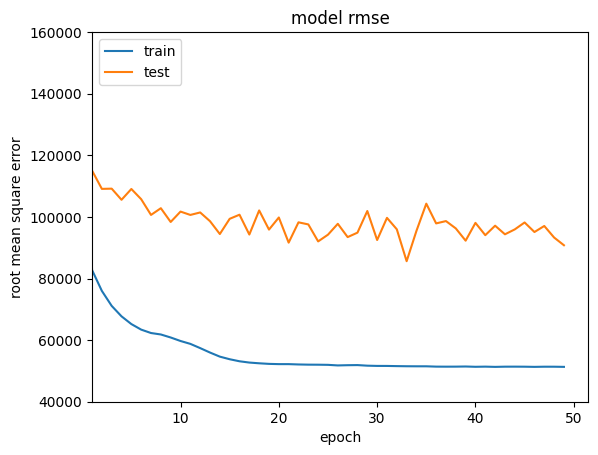

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('model rmse')
plt.ylabel('root mean square error')
plt.xlabel('epoch')
plt.xlim(1,)
plt.ylim(40000,160000)
plt.legend(['train', 'test'], loc='upper left')

### e)

In [27]:
val_rmse_per_epoch = history.history['val_rmse']
best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch))
print('Test R2 value with best epoch: %f' % (history.history['val_r2'][best_epoch-1]))

Best epoch: 34
Test R2 value with best epoch: 0.730121


The test R2 value using the model from the best epoch is 0.730121.

In [28]:
model.load_weights(checkpoint_filepath)
predicted = model.predict(test_ds)
actual = test_dataframe['resale_price']

180/180 [==============================] - 2s 5ms/step


In [29]:
test_df = df[df['year']>2020].copy()
test_df['predict'] = predicted

In [30]:
import pandas as pd
from sklearn.metrics import mean_squared_error

test_df['prediction_error'] = abs(test_df['resale_price'] - test_df['predict'])
test_df

,month,year,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,predict,prediction_error
87370,1,2021,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,07 TO 09,225000.0,654668.18750,429668.18750
87371,1,2021,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,01 TO 03,211000.0,362905.28125,151905.28125
87372,1,2021,0.994153,7.427003,0.016807,0.006243,"3 ROOM, New Generation",54.333333,73.0,04 TO 06,275888.0,457874.09375,181986.09375
87373,1,2021,1.349574,7.444314,0.016807,0.006243,"3 ROOM, New Generation",56.083333,67.0,07 TO 09,316800.0,272911.90625,43888.09375
87374,1,2021,1.349574,7.444314,0.016807,0.006243,"3 ROOM, New Generation",56.000000,67.0,10 TO 12,305000.0,314177.12500,9177.12500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133407,6,2022,0.475885,12.738721,0.016807,0.000968,"EXECUTIVE, Maisonette",64.583333,145.0,07 TO 09,810000.0,707849.87500,102150.12500
133408,1,2022,0.774113,13.229106,0.016807,0.000968,"MULTI-GENERATION, Multi Generation",65.000000,164.0,04 TO 06,785000.0,374721.53125,410278.46875
133409,2,2022,0.774113,13.229106,0.016807,0.000968,"MULTI-GENERATION, Multi Generation",64.916667,171.0,04 TO 06,842000.0,437871.09375,404128.90625
133410,2,2022,0.700595,13.222912,0.016807,0.000968,"MULTI-GENERATION, Multi Generation",64.750000,164.0,10 TO 12,845000.0,625374.87500,219625.12500


In [31]:
test_df = test_df.sort_values(by=['prediction_error'], ascending=False)
test_df.head(30)

,month,year,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,predict,prediction_error
120288,3,2022,0.516381,2.614120,0.033613,0.121082,"5 ROOM, Type S2",87.833333,107.0,46 TO 48,1388888.88,2.540775e+05,1.134811e+06
120287,3,2022,0.450314,2.546116,0.033613,0.121082,"5 ROOM, Type S2",87.916667,105.0,46 TO 48,1348888.00,2.949575e+05,1.053931e+06
127225,7,2022,0.584731,3.882019,0.016807,0.008342,"5 ROOM, Premium Apartment Loft",92.833333,122.0,37 TO 39,1418000.00,3.860032e+05,1.031997e+06
118243,3,2022,0.776182,6.297489,0.033613,0.015854,"5 ROOM, DBSS",88.500000,120.0,31 TO 33,1270000.00,2.484622e+05,1.021538e+06
120281,1,2022,0.321070,2.418684,0.033613,0.121082,"5 ROOM, Type S2",88.000000,105.0,49 TO 51,1260000.00,2.715153e+05,9.884847e+05
120285,2,2022,0.352779,2.413099,0.033613,0.121082,"5 ROOM, Type S2",87.916667,107.0,46 TO 48,1308000.00,3.231432e+05,9.848568e+05
120284,2,2022,0.401367,2.445314,0.033613,0.121082,"5 ROOM, Type S2",87.916667,106.0,31 TO 33,1268000.00,2.951405e+05,9.728595e+05
100263,6,2021,0.245207,4.709043,0.016807,0.008342,"EXECUTIVE, Apartment",73.416667,148.0,10 TO 12,1235000.00,2.650170e+05,9.699830e+05
103977,8,2021,0.767244,6.327956,0.033613,0.015854,"5 ROOM, DBSS",89.083333,120.0,22 TO 24,1240000.00,2.889313e+05,9.510687e+05
114531,12,2021,0.352779,2.413099,0.033613,0.121082,"5 ROOM, Type S2",88.083333,107.0,40 TO 42,1288000.00,3.378030e+05,9.501970e+05


For the top 30 test samples with the largest errors, most of them are underpredictions and only two are overpredictions. The difference between their actual and predicted values are at least 0.8 million. Majority of them have at least 87 remaining lease years and more than half of their storey range starts from 30 and higher. This implies that most of these HDBs are considerably new. Most are between 105 to 120 square metres and constitutes of mainly 5 ROOM HDBs. One interesting thing to note is that the two overpredictions are both 3 ROOM HDBs. Majority of these HDBs also share the same degree centrality value of either 0.033613 or 0.016807. 

One way to reduce these errors is to increase the amount of training data on resale transactions involving newer HDBs. Insufficient training data involving newer HDBs would cause the model to be inadequate at predicting the resale price of them. With more training data, the model can generalise better to achieve improved performance.

Another suggestion is to consider the impact of COVID-19 on price of resale HDBs. With COVID-19, inflation in Singapore seems to have increased. Since training data is 2020 and before, the rise in inflation may not be fully captured by the data which led underpredictions by the model.

## Question 3

### a)

In [32]:
df_old = pd.read_csv('hdb_price_prediction_old.csv')
df_old

,month,year,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104089,8,2021,710 YISHUN AVENUE 5,Yishun,0.826153,14.410089,0.016807,0.000382,"4 ROOM, New Generation",61.750000,93.0,07 TO 09,390000.0
104090,8,2021,117 YISHUN RING ROAD,Yishun,1.045337,15.215236,0.016807,0.000382,"4 ROOM, Model A",60.916667,104.0,07 TO 09,380000.0
104091,8,2021,453 YISHUN STREET 41,Khatib,1.424543,13.350952,0.016807,0.000968,"4 ROOM, Model A",91.083333,93.0,04 TO 06,433000.0
104092,8,2021,505D YISHUN STREET 51,Khatib,1.259536,13.232993,0.016807,0.000968,"4 ROOM, Model A",93.666667,93.0,01 TO 03,460000.0


In [33]:
# Drop features not used for modelling
df_old.drop(columns=['full_address', 'nearest_stn'], inplace=True)
df_old

,month,year,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
104089,8,2021,0.826153,14.410089,0.016807,0.000382,"4 ROOM, New Generation",61.750000,93.0,07 TO 09,390000.0
104090,8,2021,1.045337,15.215236,0.016807,0.000382,"4 ROOM, Model A",60.916667,104.0,07 TO 09,380000.0
104091,8,2021,1.424543,13.350952,0.016807,0.000968,"4 ROOM, Model A",91.083333,93.0,04 TO 06,433000.0
104092,8,2021,1.259536,13.232993,0.016807,0.000968,"4 ROOM, Model A",93.666667,93.0,01 TO 03,460000.0


In [34]:
# Split data
old_test_dataframe = df_old[df_old['year']==2021].copy()
new_test_2021_dataframe = df[df['year']==2021].copy()
new_test_2022_dataframe = df[df['year']==2022].copy()

del old_test_dataframe['year']
del new_test_2021_dataframe['year']
del new_test_2022_dataframe['year']

old_test_ds = dataframe_to_dataset(old_test_dataframe)
new_test_2021_ds = dataframe_to_dataset(new_test_2021_dataframe)
new_test_2022_ds = dataframe_to_dataset(new_test_2022_dataframe)

old_test_ds = old_test_ds.batch(256)
new_test_2021_ds = new_test_2021_ds.batch(256)
new_test_2022_ds = new_test_2022_ds.batch(256)

In [35]:
eval_result_old = model.evaluate(old_test_ds)
print('Test R2 value with old test set: %f' % (eval_result_old[2]))

66/66 [==============================] - 1s 8ms/step - loss: 3912685568.0000 - rmse: 62551.4648 - r2: 0.8483
Test R2 value with old test set: 0.848330


In [36]:
eval_result_2021 = model.evaluate(new_test_2021_ds)
print('Test R2 value with new test 2021 set: %f' % (eval_result_2021[2]))

114/114 [==============================] - 1s 6ms/step - loss: 4820439552.0000 - rmse: 69429.3828 - r2: 0.8159
Test R2 value with new test 2021 set: 0.815886


In [37]:
eval_result_2022 = model.evaluate(new_test_2022_ds)
print('Test R2 value with new test 2022 set: %f' % (eval_result_2022[2]))

67/67 [==============================] - 1s 6ms/step - loss: 11627792384.0000 - rmse: 107832.2422 - r2: 0.5910
Test R2 value with new test 2022 set: 0.591005


The test R2 value for the old test set is 0.848330, for the new test set 2021 is 0.815886 and for the new test set 2022 is 0.591005.

### b)

Model degradation has impacted the team's model more than mine as seen. Model degradation happens because of data distribution shifts and external factors such as policy changes that lead to fluctuations in demand. 

Their model degraded more because linear regression model requires linear relationships between predictor variables and target variable and all variables to be multivariate normal. Compared to neural network models, linear regression models are directly reliant on data distribution of variables. As such, performance of linear regression models would be more heavily impacted when a shift in data distribution occurs.

### c)

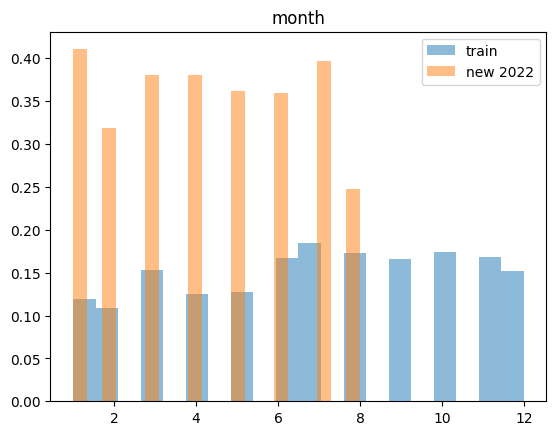

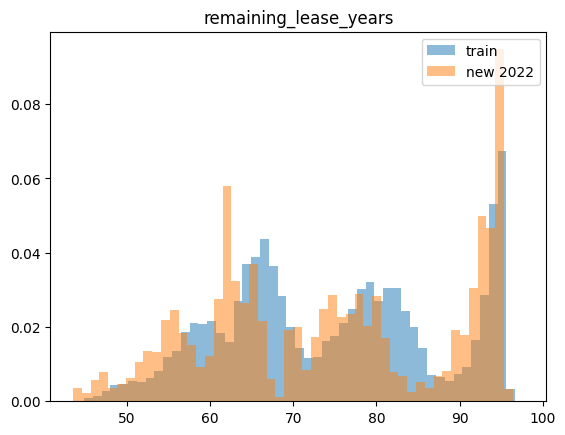

In [38]:
# Covariate shift
plt.hist(non_test_dataframe['month'], bins=20, density=True, alpha=0.5, label='train')
plt.hist(new_test_2022_dataframe['month'], bins=20, density=True, alpha=0.5, label='new 2022')
plt.title('month')
plt.legend(loc='upper right')
plt.show()

plt.hist(non_test_dataframe['remaining_lease_years'], bins=50, density=True, alpha=0.5, label='train')
plt.hist(new_test_2022_dataframe['remaining_lease_years'], bins=50, density=True, alpha=0.5, label='new 2022')
plt.title('remaining_lease_years')
plt.legend(loc='upper right')
plt.show()

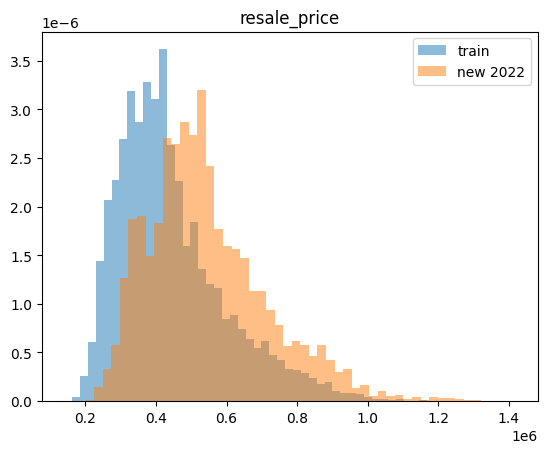

In [39]:
# Label shift
plt.hist(non_test_dataframe['resale_price'], bins=50, density=True, alpha=0.5, label='train')
plt.hist(new_test_2022_dataframe['resale_price'], bins=50, density=True, alpha=0.5, label='new 2022')
plt.title('resale_price')
plt.legend(loc='upper right')
plt.show()

The variable that showed the largest covariate shift is month. The training data contained all possible months but the new test data for 2022 only have months between January and August. Assuming that the conditional probability between month and resale price did not change, the probability of month being December is about 1/12 in the training data but that probability falls to 0 in the new test data for 2022. 

Another variable that display considerable covariate shift is remaining lease years. From the plot above, the distribution of remaining lease years in the new test data for 2022 appears to have shifted left from that of the training data. The probability of a HDB having more than 90 remaining lease years is lower in the training data.

The variable that showed the largest label shift is resale price. From the plot above, the mean of resale price increased from about 0.4e6 to about 0.5e6 and variance also seems to have increased. Assuming that the conditional probability between resale price and properties of a HDB did not change, the probability of resale price being over 0.6e6 is higher in the new test data for 2022. As such, model tends to underpredict causing a drop in model performance. 

Since model degradation are unavoidable, models can be retrained at a suitable frequency on new training data. A confidence interval can be used to determine the need for retraining so that models can be updated about the distribution of the features. Another method is to leverage techniques such as importance weighting when training the model to work for the real world data. Importance weighting consists of two steps: estimate the density ratio between the real-world input distribution and the training input distribution, then weight the training data according to this ratio, and train an ML model on this weighted data. This method however, requires knowledge of how the real-world input distribution differs from the training input distribution. 

### d)

In [40]:
import time
start = time.time()

num_features = 9

vec = [1 for i in range(num_features)]
best_loss = 1e15
new_best_loss = 1e14
which_iter = ''

all_losses = [] # should be len 9,8,7,...


def train_model(feature_mask):
    """
    Given a boolean mask (feature_mask), select the features accordingly, train the model and return the validation loss.
    """
    
    feature_mask_string = ''.join([str(i) for i in feature_mask])
    
    divisor = best_hyperparameters.get('divisor')
    
    # Integer categorical features
    month_encoded = embed_categorical_feature(month, "month", non_test_ds, False, divisor)
    month_encoded = Flatten()(month_encoded)

    # String categorical features
    flat_model_type_encoded = embed_categorical_feature(flat_model_type, "flat_model_type", non_test_ds, True, divisor)
    flat_model_type_encoded = Flatten()(flat_model_type_encoded)
    storey_range_encoded = embed_categorical_feature(storey_range, "storey_range", non_test_ds, True, divisor)
    storey_range_encoded = Flatten()(storey_range_encoded)

    # Numerical features
    dist_to_nearest_stn_encoded = encode_numerical_feature(dist_to_nearest_stn, "dist_to_nearest_stn", non_test_ds)
    dist_to_dhoby_encoded = encode_numerical_feature(dist_to_dhoby, "dist_to_dhoby", non_test_ds)
    degree_centrality_encoded = encode_numerical_feature(degree_centrality, "degree_centrality", non_test_ds)
    eigenvector_centrality_encoded = encode_numerical_feature(eigenvector_centrality, "eigenvector_centrality", non_test_ds)
    remaining_lease_years_encoded = encode_numerical_feature(remaining_lease_years, "remaining_lease_years", non_test_ds)
    floor_area_sqm_encoded = encode_numerical_feature(floor_area_sqm, "floor_area_sqm", non_test_ds)

    all_features_input = [
        month_encoded,
        flat_model_type_encoded,
        storey_range_encoded,
        dist_to_nearest_stn_encoded,
        dist_to_dhoby_encoded,
        degree_centrality_encoded,
        eigenvector_centrality_encoded,
        remaining_lease_years_encoded,
        floor_area_sqm_encoded
    ]
    
    selected_inputs = []
    print('going through feature_mask', feature_mask)
    for i,j in zip(all_features_input, feature_mask):
        if j == 1:
            selected_inputs.append(i)
            print(i)
        else:
            print('Skipping', i)

    all_features = layers.concatenate(selected_inputs)
    
    hidden = tf.keras.layers.Dense(
        units=best_hyperparameters.get('units'),
        activation='relu')(all_features)
    output = layers.Dense(1, activation="linear")(hidden)
    model = keras.Model(all_inputs, output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=best_hyperparameters.get('learning_rate')),
        loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'), r2])
    history = model.fit(non_test_ds, epochs=50, validation_data=test_ds)
    
    val_loss_hx = history.history['val_rmse'] # NOTE: You can use RMSE if you find it easier to interpret.
    val_loss_min = min(val_loss_hx)
    
    return val_loss_min

In [41]:
# RFE starts here 
while sum(vec) > 0 and best_loss > new_best_loss:
    
    print('vec', vec)

    best_loss = new_best_loss
    new_min_loss_flag = False
    
    losses_from_same_vec = []
    
    for ix, i in enumerate(vec):
        
        print('ix', ix, 'i', i)
        
        if i == 0:
            continue # if the feature is off, no need to do anything, go to next position
        else:
            temp_vec = vec[:]
            temp_vec[ix] = 0 # turn off the feature
            print('updated temp_vec', temp_vec)
            
            loss = train_model(temp_vec)
            losses_from_same_vec.append(loss)
            
            if loss < new_best_loss:
                new_best_loss = loss
                which_iter = 'len ' + str(sum(vec)) + ', ix ' + str(ix)
                print('new min loss:', which_iter)
                new_min_loss_flag = True
                min_loss_vec = temp_vec[:]

            tf.keras.backend.clear_session()
            print('session cleared!\n')
                
    
    all_losses.append(losses_from_same_vec)
    
    # After going through the vec once, update vec if new min loss    
    if new_min_loss_flag:
        vec = min_loss_vec
    
    # else case means no new min loss, the latter while loop condition will cause it to terminate 
    print(time.time() - start, 'seconds elapsed')
    print()

print(all_losses)

vec [1, 1, 1, 1, 1, 1, 1, 1, 1]
ix 0 i 1
updated temp_vec [0, 1, 1, 1, 1, 1, 1, 1, 1]
going through feature_mask [0, 1, 1, 1, 1, 1, 1, 1, 1]
Skipping KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name=None), name='flatten_6/Reshape:0', description="created by layer 'flatten_6'")
KerasTensor(type_spec=TensorSpec(shape=(None, 22), dtype=tf.float32, name=None), name='flatten_7/Reshape:0', description="created by layer 'flatten_7'")
KerasTensor(type_spec=TensorSpec(shape=(None, 9), dtype=tf.float32, name=None), name='flatten_8/Reshape:0', description="created by layer 'flatten_8'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='normalization_12/truediv:0', description="created by layer 'normalization_12'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='normalization_13/truediv:0', description="created by layer 'normalization_13'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.fl

342/342 [==============================] - 4s 10ms/step - loss: 2687815936.0000 - rmse: 51844.1523 - r2: 0.8856 - val_loss: 8812625920.0000 - val_rmse: 93875.5859 - val_r2: 0.6765
Epoch 36/50
342/342 [==============================] - 4s 10ms/step - loss: 2673121792.0000 - rmse: 51702.2422 - r2: 0.8864 - val_loss: 8397044224.0000 - val_rmse: 91635.3906 - val_r2: 0.6913
Epoch 37/50
342/342 [==============================] - 4s 11ms/step - loss: 2675500288.0000 - rmse: 51725.2383 - r2: 0.8863 - val_loss: 8562518528.0000 - val_rmse: 92533.8750 - val_r2: 0.6852
Epoch 38/50
342/342 [==============================] - 4s 10ms/step - loss: 2659287552.0000 - rmse: 51568.2812 - r2: 0.8865 - val_loss: 8663700480.0000 - val_rmse: 93079.0000 - val_r2: 0.6812
Epoch 39/50
342/342 [==============================] - 6s 14ms/step - loss: 2666020864.0000 - rmse: 51633.5234 - r2: 0.8865 - val_loss: 10036832256.0000 - val_rmse: 100183.9922 - val_r2: 0.6314
Epoch 40/50
342/342 [=============================

342/342 [==============================] - 4s 10ms/step - loss: 3266168064.0000 - rmse: 57150.3984 - r2: 0.8610 - val_loss: 9859726336.0000 - val_rmse: 99296.1562 - val_r2: 0.6380
Epoch 20/50
342/342 [==============================] - 4s 10ms/step - loss: 3245342976.0000 - rmse: 56967.9102 - r2: 0.8621 - val_loss: 10014072832.0000 - val_rmse: 100070.3359 - val_r2: 0.6322
Epoch 21/50
342/342 [==============================] - 4s 10ms/step - loss: 3231421952.0000 - rmse: 56845.5977 - r2: 0.8624 - val_loss: 10515440640.0000 - val_rmse: 102544.8203 - val_r2: 0.6142
Epoch 22/50
342/342 [==============================] - 5s 12ms/step - loss: 3210043136.0000 - rmse: 56657.2422 - r2: 0.8633 - val_loss: 10105098240.0000 - val_rmse: 100524.1172 - val_r2: 0.6289
Epoch 23/50
342/342 [==============================] - 4s 11ms/step - loss: 3195240192.0000 - rmse: 56526.4570 - r2: 0.8639 - val_loss: 10010450944.0000 - val_rmse: 100052.2422 - val_r2: 0.6326
Epoch 24/50
342/342 [=======================

342/342 [==============================] - 4s 10ms/step - loss: 7101499392.0000 - rmse: 84270.3906 - r2: 0.6997 - val_loss: 12348832768.0000 - val_rmse: 111125.3047 - val_r2: 0.5494
Epoch 4/50
342/342 [==============================] - 5s 11ms/step - loss: 6127303680.0000 - rmse: 78277.0938 - r2: 0.7403 - val_loss: 13270061056.0000 - val_rmse: 115195.7500 - val_r2: 0.5151
Epoch 5/50
342/342 [==============================] - 5s 12ms/step - loss: 5498560512.0000 - rmse: 74152.2812 - r2: 0.7671 - val_loss: 12728293376.0000 - val_rmse: 112819.7422 - val_r2: 0.5341
Epoch 6/50
342/342 [==============================] - 5s 11ms/step - loss: 5067165696.0000 - rmse: 71184.0234 - r2: 0.7849 - val_loss: 12416575488.0000 - val_rmse: 111429.6875 - val_r2: 0.5451
Epoch 7/50
342/342 [==============================] - 4s 10ms/step - loss: 4771331072.0000 - rmse: 69074.8203 - r2: 0.7974 - val_loss: 11169715200.0000 - val_rmse: 105686.8750 - val_r2: 0.5910
Epoch 8/50
342/342 [==========================

342/342 [==============================] - 4s 9ms/step - loss: 3142385920.0000 - rmse: 56056.9883 - r2: 0.8666 - val_loss: 9618837504.0000 - val_rmse: 98075.6719 - val_r2: 0.6472
Epoch 46/50
342/342 [==============================] - 4s 10ms/step - loss: 3132337152.0000 - rmse: 55967.2852 - r2: 0.8669 - val_loss: 10563155968.0000 - val_rmse: 102777.2188 - val_r2: 0.6130
Epoch 47/50
342/342 [==============================] - 5s 12ms/step - loss: 3124591360.0000 - rmse: 55898.0430 - r2: 0.8670 - val_loss: 9644023808.0000 - val_rmse: 98203.9922 - val_r2: 0.6467
Epoch 48/50
342/342 [==============================] - 5s 11ms/step - loss: 3118219264.0000 - rmse: 55841.0195 - r2: 0.8672 - val_loss: 9679226880.0000 - val_rmse: 98383.0625 - val_r2: 0.6443
Epoch 49/50
342/342 [==============================] - 5s 11ms/step - loss: 3117197824.0000 - rmse: 55831.8711 - r2: 0.8672 - val_loss: 9906821120.0000 - val_rmse: 99533.0156 - val_r2: 0.6374
Epoch 50/50
342/342 [==============================

342/342 [==============================] - 4s 10ms/step - loss: 3425810432.0000 - rmse: 58530.4219 - r2: 0.8539 - val_loss: 9894781952.0000 - val_rmse: 99472.5156 - val_r2: 0.6364
Epoch 30/50
342/342 [==============================] - 4s 10ms/step - loss: 3415622656.0000 - rmse: 58443.3281 - r2: 0.8545 - val_loss: 10727957504.0000 - val_rmse: 103575.8516 - val_r2: 0.6065
Epoch 31/50
342/342 [==============================] - 4s 10ms/step - loss: 3418473472.0000 - rmse: 58467.7148 - r2: 0.8542 - val_loss: 9455362048.0000 - val_rmse: 97238.6875 - val_r2: 0.6530
Epoch 32/50
342/342 [==============================] - 4s 10ms/step - loss: 3416827392.0000 - rmse: 58453.6328 - r2: 0.8545 - val_loss: 10508218368.0000 - val_rmse: 102509.6016 - val_r2: 0.6141
Epoch 33/50
342/342 [==============================] - 4s 10ms/step - loss: 3413404672.0000 - rmse: 58424.3516 - r2: 0.8546 - val_loss: 8657163264.0000 - val_rmse: 93043.8750 - val_r2: 0.6825
Epoch 34/50
342/342 [===========================

342/342 [==============================] - 4s 10ms/step - loss: 6495047168.0000 - rmse: 80591.8594 - r2: 0.7241 - val_loss: 13822753792.0000 - val_rmse: 117570.2109 - val_r2: 0.4938
Epoch 14/50
342/342 [==============================] - 4s 11ms/step - loss: 6485917184.0000 - rmse: 80535.1953 - r2: 0.7241 - val_loss: 12788094976.0000 - val_rmse: 113084.4609 - val_r2: 0.5319
Epoch 15/50
342/342 [==============================] - 4s 10ms/step - loss: 6417119232.0000 - rmse: 80106.9219 - r2: 0.7275 - val_loss: 13149890560.0000 - val_rmse: 114672.9688 - val_r2: 0.5187
Epoch 16/50
342/342 [==============================] - 5s 11ms/step - loss: 6350025216.0000 - rmse: 79687.0469 - r2: 0.7304 - val_loss: 13460235264.0000 - val_rmse: 116018.2578 - val_r2: 0.5074
Epoch 17/50
342/342 [==============================] - 4s 11ms/step - loss: 6269066240.0000 - rmse: 79177.4375 - r2: 0.7341 - val_loss: 13092453376.0000 - val_rmse: 114422.2578 - val_r2: 0.5214
Epoch 18/50
342/342 [=====================

342/342 [==============================] - 7s 12ms/step - loss: 38518304768.0000 - rmse: 196260.8125 - r2: -0.6471 - val_loss: 13541260288.0000 - val_rmse: 116366.9219 - val_r2: 0.5054
Epoch 2/50
342/342 [==============================] - 4s 10ms/step - loss: 7075322880.0000 - rmse: 84114.9375 - r2: 0.6995 - val_loss: 12688892928.0000 - val_rmse: 112644.9844 - val_r2: 0.5364
Epoch 3/50
342/342 [==============================] - 4s 10ms/step - loss: 6027579392.0000 - rmse: 77637.4844 - r2: 0.7442 - val_loss: 12712019968.0000 - val_rmse: 112747.5938 - val_r2: 0.5343
Epoch 4/50
342/342 [==============================] - 4s 10ms/step - loss: 5244977664.0000 - rmse: 72422.2188 - r2: 0.7774 - val_loss: 10910444544.0000 - val_rmse: 104453.0703 - val_r2: 0.6010
Epoch 5/50
342/342 [==============================] - 4s 10ms/step - loss: 4732897280.0000 - rmse: 68796.0547 - r2: 0.7989 - val_loss: 11060055040.0000 - val_rmse: 105166.7969 - val_r2: 0.5950
Epoch 6/50
342/342 [=======================

Epoch 44/50
342/342 [==============================] - 4s 11ms/step - loss: 2667245568.0000 - rmse: 51645.3828 - r2: 0.8862 - val_loss: 10154065920.0000 - val_rmse: 100767.3828 - val_r2: 0.6272
Epoch 45/50
342/342 [==============================] - 4s 10ms/step - loss: 2657394944.0000 - rmse: 51549.9258 - r2: 0.8869 - val_loss: 9608369152.0000 - val_rmse: 98022.2891 - val_r2: 0.6473
Epoch 46/50
342/342 [==============================] - 4s 10ms/step - loss: 2643228160.0000 - rmse: 51412.3359 - r2: 0.8876 - val_loss: 8463689216.0000 - val_rmse: 91998.3125 - val_r2: 0.6895
Epoch 47/50
342/342 [==============================] - 4s 10ms/step - loss: 2632696320.0000 - rmse: 51309.8086 - r2: 0.8880 - val_loss: 8930170880.0000 - val_rmse: 94499.5781 - val_r2: 0.6725
Epoch 48/50
342/342 [==============================] - 4s 10ms/step - loss: 2633102080.0000 - rmse: 51313.7617 - r2: 0.8880 - val_loss: 8290647552.0000 - val_rmse: 91052.9922 - val_r2: 0.6953
Epoch 49/50
342/342 [=================

342/342 [==============================] - 4s 10ms/step - loss: 2745360384.0000 - rmse: 52396.1875 - r2: 0.8833 - val_loss: 9593324544.0000 - val_rmse: 97945.5156 - val_r2: 0.6478
Epoch 29/50
342/342 [==============================] - 4s 11ms/step - loss: 2756094976.0000 - rmse: 52498.5234 - r2: 0.8819 - val_loss: 9708332032.0000 - val_rmse: 98530.8672 - val_r2: 0.6430
Epoch 30/50
342/342 [==============================] - 4s 10ms/step - loss: 2749394944.0000 - rmse: 52434.6719 - r2: 0.8829 - val_loss: 8839973888.0000 - val_rmse: 94021.1328 - val_r2: 0.6755
Epoch 31/50
342/342 [==============================] - 4s 9ms/step - loss: 2739171072.0000 - rmse: 52337.0898 - r2: 0.8834 - val_loss: 9200897024.0000 - val_rmse: 95921.3047 - val_r2: 0.6618
Epoch 32/50
342/342 [==============================] - 4s 9ms/step - loss: 2734226176.0000 - rmse: 52289.8281 - r2: 0.8836 - val_loss: 9318828032.0000 - val_rmse: 96534.0781 - val_r2: 0.6575
Epoch 33/50
342/342 [==============================] -

342/342 [==============================] - 4s 10ms/step - loss: 4388868096.0000 - rmse: 66248.5312 - r2: 0.8135 - val_loss: 9542472704.0000 - val_rmse: 97685.5781 - val_r2: 0.6505
Epoch 13/50
342/342 [==============================] - 4s 10ms/step - loss: 4394916864.0000 - rmse: 66294.1719 - r2: 0.8131 - val_loss: 10374128640.0000 - val_rmse: 101853.4688 - val_r2: 0.6202
Epoch 14/50
342/342 [==============================] - 4s 10ms/step - loss: 4387913216.0000 - rmse: 66241.3281 - r2: 0.8133 - val_loss: 10003720192.0000 - val_rmse: 100018.6016 - val_r2: 0.6331
Epoch 15/50
342/342 [==============================] - 4s 10ms/step - loss: 4377180160.0000 - rmse: 66160.2578 - r2: 0.8138 - val_loss: 10555387904.0000 - val_rmse: 102739.4141 - val_r2: 0.6131
Epoch 16/50
342/342 [==============================] - 4s 10ms/step - loss: 4377495040.0000 - rmse: 66162.6406 - r2: 0.8139 - val_loss: 9913779200.0000 - val_rmse: 99567.9609 - val_r2: 0.6369
Epoch 17/50
342/342 [=========================

342/342 [==============================] - 6s 11ms/step - loss: 36950130688.0000 - rmse: 192224.1719 - r2: -0.5693 - val_loss: 13973936128.0000 - val_rmse: 118211.4062 - val_r2: 0.4886
Epoch 2/50
342/342 [==============================] - 4s 11ms/step - loss: 6637263872.0000 - rmse: 81469.4062 - r2: 0.7185 - val_loss: 12025774080.0000 - val_rmse: 109662.0938 - val_r2: 0.5599
Epoch 3/50
342/342 [==============================] - 4s 10ms/step - loss: 5567616000.0000 - rmse: 74616.4609 - r2: 0.7642 - val_loss: 11889610752.0000 - val_rmse: 109039.4922 - val_r2: 0.5647
Epoch 4/50
342/342 [==============================] - 4s 10ms/step - loss: 4923010048.0000 - rmse: 70164.1641 - r2: 0.7908 - val_loss: 11476549632.0000 - val_rmse: 107128.6562 - val_r2: 0.5788
Epoch 5/50
342/342 [==============================] - 4s 9ms/step - loss: 4529791488.0000 - rmse: 67303.7266 - r2: 0.8078 - val_loss: 9051320320.0000 - val_rmse: 95138.4297 - val_r2: 0.6688
Epoch 6/50
342/342 [==========================

342/342 [==============================] - 4s 10ms/step - loss: 2891797760.0000 - rmse: 53775.4375 - r2: 0.8769 - val_loss: 9183140864.0000 - val_rmse: 95828.7031 - val_r2: 0.6625
Epoch 44/50
342/342 [==============================] - 4s 10ms/step - loss: 2893254656.0000 - rmse: 53788.9844 - r2: 0.8769 - val_loss: 9898634240.0000 - val_rmse: 99491.8828 - val_r2: 0.6367
Epoch 45/50
342/342 [==============================] - 4s 10ms/step - loss: 2879571200.0000 - rmse: 53661.6367 - r2: 0.8775 - val_loss: 8571602944.0000 - val_rmse: 92582.9531 - val_r2: 0.6859
Epoch 46/50
342/342 [==============================] - 4s 10ms/step - loss: 2884286464.0000 - rmse: 53705.5547 - r2: 0.8774 - val_loss: 9268441088.0000 - val_rmse: 96272.7422 - val_r2: 0.6599
Epoch 47/50
342/342 [==============================] - 4s 11ms/step - loss: 2879565824.0000 - rmse: 53661.5859 - r2: 0.8773 - val_loss: 9061958656.0000 - val_rmse: 95194.3203 - val_r2: 0.6678
Epoch 48/50
342/342 [==============================]

Epoch 27/50
342/342 [==============================] - 4s 10ms/step - loss: 3150224896.0000 - rmse: 56126.8633 - r2: 0.8660 - val_loss: 9450905600.0000 - val_rmse: 97215.7656 - val_r2: 0.6525
Epoch 28/50
342/342 [==============================] - 4s 9ms/step - loss: 3118960896.0000 - rmse: 55847.6562 - r2: 0.8674 - val_loss: 9574331392.0000 - val_rmse: 97848.5156 - val_r2: 0.6489
Epoch 29/50
342/342 [==============================] - 4s 10ms/step - loss: 3093577728.0000 - rmse: 55619.9414 - r2: 0.8685 - val_loss: 10617525248.0000 - val_rmse: 103041.3750 - val_r2: 0.6105
Epoch 30/50
342/342 [==============================] - 4s 9ms/step - loss: 3057777408.0000 - rmse: 55297.1719 - r2: 0.8701 - val_loss: 9255285760.0000 - val_rmse: 96204.3984 - val_r2: 0.6603
Epoch 31/50
342/342 [==============================] - 4s 10ms/step - loss: 3041084416.0000 - rmse: 55146.0273 - r2: 0.8705 - val_loss: 9266309120.0000 - val_rmse: 96261.6719 - val_r2: 0.6602
Epoch 32/50
342/342 [===================

342/342 [==============================] - 4s 10ms/step - loss: 3676330240.0000 - rmse: 60632.7500 - r2: 0.8438 - val_loss: 10625078272.0000 - val_rmse: 103078.0234 - val_r2: 0.6103
Epoch 12/50
342/342 [==============================] - 4s 10ms/step - loss: 3537280512.0000 - rmse: 59475.0430 - r2: 0.8498 - val_loss: 9868322816.0000 - val_rmse: 99339.4297 - val_r2: 0.6378
Epoch 13/50
342/342 [==============================] - 4s 9ms/step - loss: 3441346816.0000 - rmse: 58662.9922 - r2: 0.8536 - val_loss: 9454558208.0000 - val_rmse: 97234.5547 - val_r2: 0.6537
Epoch 14/50
342/342 [==============================] - 4s 9ms/step - loss: 3382914304.0000 - rmse: 58162.8242 - r2: 0.8561 - val_loss: 9659278336.0000 - val_rmse: 98281.6250 - val_r2: 0.6457
Epoch 15/50
342/342 [==============================] - 4s 9ms/step - loss: 3323325440.0000 - rmse: 57648.2891 - r2: 0.8589 - val_loss: 10822123520.0000 - val_rmse: 104029.4375 - val_r2: 0.6024
Epoch 16/50
342/342 [==============================

342/342 [==============================] - 6s 11ms/step - loss: 40118124544.0000 - rmse: 200295.0938 - r2: -0.6893 - val_loss: 13733961728.0000 - val_rmse: 117191.9844 - val_r2: 0.4979
Epoch 2/50
342/342 [==============================] - 4s 10ms/step - loss: 7261144576.0000 - rmse: 85212.3516 - r2: 0.6927 - val_loss: 13021935616.0000 - val_rmse: 114113.6953 - val_r2: 0.5235
Epoch 3/50
342/342 [==============================] - 4s 10ms/step - loss: 6369679872.0000 - rmse: 79810.2734 - r2: 0.7299 - val_loss: 11992525824.0000 - val_rmse: 109510.3906 - val_r2: 0.5615
Epoch 4/50
342/342 [==============================] - 4s 10ms/step - loss: 5711176192.0000 - rmse: 75572.3281 - r2: 0.7573 - val_loss: 11466762240.0000 - val_rmse: 107082.9688 - val_r2: 0.5802
Epoch 5/50
342/342 [==============================] - 4s 10ms/step - loss: 5234723328.0000 - rmse: 72351.3906 - r2: 0.7782 - val_loss: 11290347520.0000 - val_rmse: 106256.0469 - val_r2: 0.5871
Epoch 6/50
342/342 [=======================

342/342 [==============================] - 4s 10ms/step - loss: 3418517504.0000 - rmse: 58468.0898 - r2: 0.8547 - val_loss: 9682555904.0000 - val_rmse: 98399.9766 - val_r2: 0.6450
Epoch 44/50
342/342 [==============================] - 4s 9ms/step - loss: 3412119808.0000 - rmse: 58413.3516 - r2: 0.8546 - val_loss: 10604908544.0000 - val_rmse: 102980.1328 - val_r2: 0.6114
Epoch 45/50
342/342 [==============================] - 4s 9ms/step - loss: 3427913472.0000 - rmse: 58548.3867 - r2: 0.8540 - val_loss: 10380974080.0000 - val_rmse: 101887.0625 - val_r2: 0.6188
Epoch 46/50
342/342 [==============================] - 4s 10ms/step - loss: 3417886208.0000 - rmse: 58462.6914 - r2: 0.8547 - val_loss: 9080865792.0000 - val_rmse: 95293.5781 - val_r2: 0.6660
Epoch 47/50
342/342 [==============================] - 4s 10ms/step - loss: 3418754560.0000 - rmse: 58470.1172 - r2: 0.8546 - val_loss: 9918998528.0000 - val_rmse: 99594.1719 - val_r2: 0.6358
Epoch 48/50
342/342 [=============================

342/342 [==============================] - 4s 10ms/step - loss: 6427450368.0000 - rmse: 80171.3828 - r2: 0.7269 - val_loss: 13985045504.0000 - val_rmse: 118258.3828 - val_r2: 0.4877
Epoch 28/50
342/342 [==============================] - 4s 10ms/step - loss: 6421707776.0000 - rmse: 80135.5625 - r2: 0.7275 - val_loss: 11251936256.0000 - val_rmse: 106075.1406 - val_r2: 0.5886
Epoch 29/50
342/342 [==============================] - 4s 9ms/step - loss: 6431938048.0000 - rmse: 80199.3672 - r2: 0.7269 - val_loss: 12299720704.0000 - val_rmse: 110904.1094 - val_r2: 0.5486
Epoch 30/50
342/342 [==============================] - 4s 10ms/step - loss: 6419108352.0000 - rmse: 80119.3359 - r2: 0.7277 - val_loss: 12893784064.0000 - val_rmse: 113550.7969 - val_r2: 0.5272
Epoch 31/50
342/342 [==============================] - 4s 10ms/step - loss: 6415162368.0000 - rmse: 80094.7109 - r2: 0.7275 - val_loss: 13333262336.0000 - val_rmse: 115469.7500 - val_r2: 0.5116
Epoch 32/50
342/342 [======================

342/342 [==============================] - 4s 10ms/step - loss: 3864764672.0000 - rmse: 62167.2305 - r2: 0.8359 - val_loss: 9950793728.0000 - val_rmse: 99753.6641 - val_r2: 0.6351
Epoch 12/50
342/342 [==============================] - 4s 10ms/step - loss: 3760995072.0000 - rmse: 61326.9531 - r2: 0.8399 - val_loss: 9806168064.0000 - val_rmse: 99026.1016 - val_r2: 0.6406
Epoch 13/50
342/342 [==============================] - 4s 10ms/step - loss: 3651118080.0000 - rmse: 60424.4844 - r2: 0.8451 - val_loss: 9675260928.0000 - val_rmse: 98362.9062 - val_r2: 0.6457
Epoch 14/50
342/342 [==============================] - 4s 10ms/step - loss: 3527437568.0000 - rmse: 59392.2344 - r2: 0.8502 - val_loss: 9043502080.0000 - val_rmse: 95097.3281 - val_r2: 0.6686
Epoch 15/50
342/342 [==============================] - 4s 10ms/step - loss: 3349031424.0000 - rmse: 57870.8164 - r2: 0.8577 - val_loss: 9476492288.0000 - val_rmse: 97347.2734 - val_r2: 0.6522
Epoch 16/50
342/342 [==============================]

342/342 [==============================] - 6s 11ms/step - loss: 42334912512.0000 - rmse: 205754.5000 - r2: -0.7744 - val_loss: 14094278656.0000 - val_rmse: 118719.3281 - val_r2: 0.4850
Epoch 2/50
342/342 [==============================] - 4s 10ms/step - loss: 7231461376.0000 - rmse: 85038.0000 - r2: 0.6936 - val_loss: 13363282944.0000 - val_rmse: 115599.6641 - val_r2: 0.5113
Epoch 3/50
342/342 [==============================] - 4s 10ms/step - loss: 6195255808.0000 - rmse: 78709.9453 - r2: 0.7371 - val_loss: 11410480128.0000 - val_rmse: 106819.8516 - val_r2: 0.5824
Epoch 4/50
342/342 [==============================] - 4s 9ms/step - loss: 5296491008.0000 - rmse: 72776.9922 - r2: 0.7754 - val_loss: 10961738752.0000 - val_rmse: 104698.3203 - val_r2: 0.5989
Epoch 5/50
342/342 [==============================] - 4s 9ms/step - loss: 4627815424.0000 - rmse: 68028.0469 - r2: 0.8037 - val_loss: 9621245952.0000 - val_rmse: 98087.9531 - val_r2: 0.6473
Epoch 6/50
342/342 [===========================

Epoch 44/50
342/342 [==============================] - 4s 10ms/step - loss: 2655968000.0000 - rmse: 51536.0859 - r2: 0.8871 - val_loss: 8802025472.0000 - val_rmse: 93819.1094 - val_r2: 0.6774
Epoch 45/50
342/342 [==============================] - 4s 10ms/step - loss: 2648743424.0000 - rmse: 51465.9453 - r2: 0.8870 - val_loss: 8655414272.0000 - val_rmse: 93034.4766 - val_r2: 0.6822
Epoch 46/50
342/342 [==============================] - 4s 10ms/step - loss: 2635138816.0000 - rmse: 51333.6016 - r2: 0.8877 - val_loss: 9927723008.0000 - val_rmse: 99637.9609 - val_r2: 0.6359
Epoch 47/50
342/342 [==============================] - 4s 10ms/step - loss: 2636303360.0000 - rmse: 51344.9453 - r2: 0.8878 - val_loss: 10245341184.0000 - val_rmse: 101219.2734 - val_r2: 0.6234
Epoch 48/50
342/342 [==============================] - 4s 10ms/step - loss: 2634353152.0000 - rmse: 51325.9492 - r2: 0.8882 - val_loss: 9532495872.0000 - val_rmse: 97634.5000 - val_r2: 0.6497
Epoch 49/50
342/342 [=================

342/342 [==============================] - 4s 10ms/step - loss: 3531930624.0000 - rmse: 59430.0469 - r2: 0.8498 - val_loss: 9466459136.0000 - val_rmse: 97295.7266 - val_r2: 0.6520
Epoch 29/50
342/342 [==============================] - 4s 10ms/step - loss: 3525206272.0000 - rmse: 59373.4492 - r2: 0.8504 - val_loss: 10277156864.0000 - val_rmse: 101376.3125 - val_r2: 0.6228
Epoch 30/50
342/342 [==============================] - 4s 10ms/step - loss: 3541672704.0000 - rmse: 59511.9531 - r2: 0.8492 - val_loss: 10272369664.0000 - val_rmse: 101352.7031 - val_r2: 0.6222
Epoch 31/50
342/342 [==============================] - 4s 10ms/step - loss: 3530142208.0000 - rmse: 59415.0000 - r2: 0.8497 - val_loss: 11704769536.0000 - val_rmse: 108188.5859 - val_r2: 0.5697
Epoch 32/50
342/342 [==============================] - 4s 10ms/step - loss: 3535685376.0000 - rmse: 59461.6289 - r2: 0.8495 - val_loss: 9606372352.0000 - val_rmse: 98012.1016 - val_r2: 0.6473
Epoch 33/50
342/342 [=========================

342/342 [==============================] - 4s 10ms/step - loss: 4066364416.0000 - rmse: 63768.0508 - r2: 0.8273 - val_loss: 9505465344.0000 - val_rmse: 97495.9766 - val_r2: 0.6513
Epoch 13/50
342/342 [==============================] - 4s 10ms/step - loss: 4061253376.0000 - rmse: 63727.9648 - r2: 0.8272 - val_loss: 11118676992.0000 - val_rmse: 105445.1406 - val_r2: 0.5928
Epoch 14/50
342/342 [==============================] - 4s 10ms/step - loss: 4061551872.0000 - rmse: 63730.3047 - r2: 0.8273 - val_loss: 9415079936.0000 - val_rmse: 97031.3359 - val_r2: 0.6551
Epoch 15/50
342/342 [==============================] - 4s 10ms/step - loss: 4073492736.0000 - rmse: 63823.9180 - r2: 0.8270 - val_loss: 11364059136.0000 - val_rmse: 106602.3438 - val_r2: 0.5832
Epoch 16/50
342/342 [==============================] - 4s 10ms/step - loss: 4063628288.0000 - rmse: 63746.5938 - r2: 0.8273 - val_loss: 11279731712.0000 - val_rmse: 106206.0781 - val_r2: 0.5861
Epoch 17/50
342/342 [=========================

342/342 [==============================] - 5s 10ms/step - loss: 57226555392.0000 - rmse: 239220.7188 - r2: -1.3985 - val_loss: 24973109248.0000 - val_rmse: 158028.8281 - val_r2: 0.0871
Epoch 2/50
342/342 [==============================] - 4s 9ms/step - loss: 12870319104.0000 - rmse: 113447.4297 - r2: 0.4561 - val_loss: 18905931776.0000 - val_rmse: 137498.8438 - val_r2: 0.3082
Epoch 3/50
342/342 [==============================] - 4s 9ms/step - loss: 7967664640.0000 - rmse: 89261.7734 - r2: 0.6629 - val_loss: 14505037824.0000 - val_rmse: 120436.8594 - val_r2: 0.4687
Epoch 4/50
342/342 [==============================] - 4s 9ms/step - loss: 5204116480.0000 - rmse: 72139.5625 - r2: 0.7794 - val_loss: 11672753152.0000 - val_rmse: 108040.5156 - val_r2: 0.5731
Epoch 5/50
342/342 [==============================] - 4s 9ms/step - loss: 4147888896.0000 - rmse: 64404.1055 - r2: 0.8241 - val_loss: 10507012096.0000 - val_rmse: 102503.7188 - val_r2: 0.6153
Epoch 6/50
342/342 [=========================

Epoch 44/50
342/342 [==============================] - 4s 9ms/step - loss: 3449720832.0000 - rmse: 58734.3242 - r2: 0.8534 - val_loss: 8478024192.0000 - val_rmse: 92076.1875 - val_r2: 0.6889
Epoch 45/50
342/342 [==============================] - 4s 9ms/step - loss: 3451359232.0000 - rmse: 58748.2695 - r2: 0.8532 - val_loss: 8696353792.0000 - val_rmse: 93254.2422 - val_r2: 0.6815
Epoch 46/50
342/342 [==============================] - 4s 9ms/step - loss: 3451948032.0000 - rmse: 58753.2812 - r2: 0.8531 - val_loss: 9417942016.0000 - val_rmse: 97046.0781 - val_r2: 0.6546
Epoch 47/50
342/342 [==============================] - 4s 9ms/step - loss: 3448558848.0000 - rmse: 58724.4297 - r2: 0.8531 - val_loss: 9910111232.0000 - val_rmse: 99549.5391 - val_r2: 0.6366
Epoch 48/50
342/342 [==============================] - 4s 9ms/step - loss: 3449134336.0000 - rmse: 58729.3320 - r2: 0.8535 - val_loss: 9806157824.0000 - val_rmse: 99026.0469 - val_r2: 0.6408
Epoch 49/50
342/342 [========================

342/342 [==============================] - 4s 10ms/step - loss: 3396829952.0000 - rmse: 58282.3281 - r2: 0.8557 - val_loss: 9787841536.0000 - val_rmse: 98933.5234 - val_r2: 0.6409
Epoch 29/50
342/342 [==============================] - 4s 9ms/step - loss: 3397689856.0000 - rmse: 58289.7070 - r2: 0.8555 - val_loss: 10475675648.0000 - val_rmse: 102350.7500 - val_r2: 0.6157
Epoch 30/50
342/342 [==============================] - 4s 10ms/step - loss: 3406810368.0000 - rmse: 58367.8867 - r2: 0.8549 - val_loss: 11142621184.0000 - val_rmse: 105558.6172 - val_r2: 0.5908
Epoch 31/50
342/342 [==============================] - 4s 9ms/step - loss: 3402963712.0000 - rmse: 58334.9258 - r2: 0.8552 - val_loss: 8785906688.0000 - val_rmse: 93733.1641 - val_r2: 0.6783
Epoch 32/50
342/342 [==============================] - 4s 10ms/step - loss: 3392778496.0000 - rmse: 58247.5625 - r2: 0.8559 - val_loss: 11514395648.0000 - val_rmse: 107305.1484 - val_r2: 0.5780
Epoch 33/50
342/342 [===========================

342/342 [==============================] - 4s 10ms/step - loss: 4533910016.0000 - rmse: 67334.3125 - r2: 0.8072 - val_loss: 9978904576.0000 - val_rmse: 99894.4688 - val_r2: 0.6343
Epoch 13/50
342/342 [==============================] - 4s 10ms/step - loss: 4521520128.0000 - rmse: 67242.2500 - r2: 0.8078 - val_loss: 11019227136.0000 - val_rmse: 104972.5078 - val_r2: 0.5968
Epoch 14/50
342/342 [==============================] - 4s 10ms/step - loss: 4502609408.0000 - rmse: 67101.4844 - r2: 0.8087 - val_loss: 10090313728.0000 - val_rmse: 100450.5547 - val_r2: 0.6306
Epoch 15/50
342/342 [==============================] - 4s 10ms/step - loss: 4490478592.0000 - rmse: 67011.0312 - r2: 0.8090 - val_loss: 9718649856.0000 - val_rmse: 98583.2109 - val_r2: 0.6438
Epoch 16/50
342/342 [==============================] - 4s 10ms/step - loss: 4484122624.0000 - rmse: 66963.5938 - r2: 0.8093 - val_loss: 11592458240.0000 - val_rmse: 107668.2812 - val_r2: 0.5751
Epoch 17/50
342/342 [=========================

342/342 [==============================] - 6s 11ms/step - loss: 40804003840.0000 - rmse: 202000.0156 - r2: -0.7426 - val_loss: 14631599104.0000 - val_rmse: 120961.1484 - val_r2: 0.4657
Epoch 2/50
342/342 [==============================] - 4s 10ms/step - loss: 8009360384.0000 - rmse: 89495.0312 - r2: 0.6605 - val_loss: 12839598080.0000 - val_rmse: 113311.9531 - val_r2: 0.5297
Epoch 3/50
342/342 [==============================] - 4s 10ms/step - loss: 7515068416.0000 - rmse: 86689.4922 - r2: 0.6812 - val_loss: 13498671104.0000 - val_rmse: 116183.7812 - val_r2: 0.5052
Epoch 4/50
342/342 [==============================] - 4s 10ms/step - loss: 7184220160.0000 - rmse: 84759.7812 - r2: 0.6956 - val_loss: 13449430016.0000 - val_rmse: 115971.6797 - val_r2: 0.5075
Epoch 5/50
342/342 [==============================] - 4s 10ms/step - loss: 7017106432.0000 - rmse: 83768.1719 - r2: 0.7020 - val_loss: 13045427200.0000 - val_rmse: 114216.5781 - val_r2: 0.5219
Epoch 6/50
342/342 [=======================

342/342 [==============================] - 4s 10ms/step - loss: 5958638592.0000 - rmse: 77192.2188 - r2: 0.7468 - val_loss: 12438553600.0000 - val_rmse: 111528.2656 - val_r2: 0.5453
Epoch 44/50
342/342 [==============================] - 4s 11ms/step - loss: 5979529728.0000 - rmse: 77327.4219 - r2: 0.7456 - val_loss: 11905643520.0000 - val_rmse: 109112.9844 - val_r2: 0.5642
Epoch 45/50
342/342 [==============================] - 4s 10ms/step - loss: 5967382528.0000 - rmse: 77248.8359 - r2: 0.7463 - val_loss: 11543940096.0000 - val_rmse: 107442.7266 - val_r2: 0.5774
Epoch 46/50
342/342 [==============================] - 4s 9ms/step - loss: 5973059072.0000 - rmse: 77285.5703 - r2: 0.7454 - val_loss: 12062922752.0000 - val_rmse: 109831.3359 - val_r2: 0.5580
Epoch 47/50
342/342 [==============================] - 4s 11ms/step - loss: 5955142144.0000 - rmse: 77169.5703 - r2: 0.7465 - val_loss: 12429271040.0000 - val_rmse: 111486.6406 - val_r2: 0.5452
Epoch 48/50
342/342 [======================

342/342 [==============================] - 4s 10ms/step - loss: 3486252800.0000 - rmse: 59044.5000 - r2: 0.8518 - val_loss: 9683972096.0000 - val_rmse: 98407.1719 - val_r2: 0.6449
Epoch 28/50
342/342 [==============================] - 4s 10ms/step - loss: 3280456704.0000 - rmse: 57275.2695 - r2: 0.8608 - val_loss: 9294221312.0000 - val_rmse: 96406.5391 - val_r2: 0.6585
Epoch 29/50
342/342 [==============================] - 4s 10ms/step - loss: 3122809344.0000 - rmse: 55882.1016 - r2: 0.8672 - val_loss: 9700483072.0000 - val_rmse: 98491.0312 - val_r2: 0.6436
Epoch 30/50
342/342 [==============================] - 4s 10ms/step - loss: 3005108736.0000 - rmse: 54818.8711 - r2: 0.8720 - val_loss: 8771578880.0000 - val_rmse: 93656.7109 - val_r2: 0.6782
Epoch 31/50
342/342 [==============================] - 4s 11ms/step - loss: 2943867904.0000 - rmse: 54257.4219 - r2: 0.8747 - val_loss: 11100527616.0000 - val_rmse: 105359.0391 - val_r2: 0.5932
Epoch 32/50
342/342 [=============================

342/342 [==============================] - 4s 10ms/step - loss: 4499578368.0000 - rmse: 67078.8984 - r2: 0.8087 - val_loss: 10610011136.0000 - val_rmse: 103004.9062 - val_r2: 0.6115
Epoch 12/50
342/342 [==============================] - 4s 10ms/step - loss: 4506274816.0000 - rmse: 67128.7891 - r2: 0.8085 - val_loss: 10475830272.0000 - val_rmse: 102351.5000 - val_r2: 0.6156
Epoch 13/50
342/342 [==============================] - 4s 10ms/step - loss: 4499181056.0000 - rmse: 67075.9375 - r2: 0.8088 - val_loss: 10677572608.0000 - val_rmse: 103332.3438 - val_r2: 0.6086
Epoch 14/50
342/342 [==============================] - 4s 10ms/step - loss: 4498329600.0000 - rmse: 67069.5859 - r2: 0.8088 - val_loss: 11150623744.0000 - val_rmse: 105596.5156 - val_r2: 0.5913
Epoch 15/50
342/342 [==============================] - 4s 10ms/step - loss: 4503948288.0000 - rmse: 67111.4609 - r2: 0.8085 - val_loss: 10585728000.0000 - val_rmse: 102886.9688 - val_r2: 0.6126
Epoch 16/50
342/342 [=====================

342/342 [==============================] - 6s 11ms/step - loss: 37889531904.0000 - rmse: 194652.3438 - r2: -0.5995 - val_loss: 13352877056.0000 - val_rmse: 115554.6484 - val_r2: 0.5125
Epoch 2/50
342/342 [==============================] - 4s 10ms/step - loss: 6719251968.0000 - rmse: 81971.0469 - r2: 0.7148 - val_loss: 12223494144.0000 - val_rmse: 110559.9141 - val_r2: 0.5529
Epoch 3/50
342/342 [==============================] - 4s 10ms/step - loss: 5649780224.0000 - rmse: 75165.0234 - r2: 0.7604 - val_loss: 11745519616.0000 - val_rmse: 108376.7500 - val_r2: 0.5696
Epoch 4/50
342/342 [==============================] - 4s 10ms/step - loss: 4976196096.0000 - rmse: 70542.1562 - r2: 0.7886 - val_loss: 10921746432.0000 - val_rmse: 104507.1562 - val_r2: 0.5996
Epoch 5/50
342/342 [==============================] - 4s 10ms/step - loss: 4593357312.0000 - rmse: 67774.3125 - r2: 0.8049 - val_loss: 10880302080.0000 - val_rmse: 104308.6875 - val_r2: 0.6015
Epoch 6/50
342/342 [=======================

342/342 [==============================] - 4s 11ms/step - loss: 3196878848.0000 - rmse: 56540.9492 - r2: 0.8639 - val_loss: 10068876288.0000 - val_rmse: 100343.7891 - val_r2: 0.6302
Epoch 44/50
342/342 [==============================] - 5s 11ms/step - loss: 3192229632.0000 - rmse: 56499.8203 - r2: 0.8640 - val_loss: 8162135040.0000 - val_rmse: 90344.5391 - val_r2: 0.7004
Epoch 45/50
342/342 [==============================] - 4s 11ms/step - loss: 3202368768.0000 - rmse: 56589.4766 - r2: 0.8636 - val_loss: 9651129344.0000 - val_rmse: 98240.1641 - val_r2: 0.6453
Epoch 46/50
342/342 [==============================] - 4s 11ms/step - loss: 3186488320.0000 - rmse: 56448.9883 - r2: 0.8647 - val_loss: 7564279296.0000 - val_rmse: 86972.8672 - val_r2: 0.7226
Epoch 47/50
342/342 [==============================] - 4s 11ms/step - loss: 3187148288.0000 - rmse: 56454.8359 - r2: 0.8643 - val_loss: 8360184320.0000 - val_rmse: 91434.0469 - val_r2: 0.6929
Epoch 48/50
342/342 [=============================

In [42]:
feature_names = []
for input_layer in all_inputs:
    feature_names.append(input_layer.name)

print(feature_names)

['month', 'flat_model_type', 'storey_range', 'dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']


In [43]:
new_all_losses = []
index_removed = []
legend = ['nothing removed']
for i in range(len(all_losses)):
    if len(all_losses[i])==len(feature_names): 
        new_all_losses.append(all_losses[i])
        index_removed.insert(0, all_losses[i].index(min(all_losses[i])))
        legend.append(feature_names[new_all_losses[i].index(min(new_all_losses[i]))]+' removed')
    else:
        cur_loss = all_losses[i].copy()
        for _idx in index_removed:
            cur_loss.insert(_idx, None)
        index_removed.insert(0, all_losses[i].index(min(_ for _ in all_losses[i] if _ is not None)))
        new_all_losses.append(cur_loss)
        if i < len(all_losses)-1: legend.append(feature_names[new_all_losses[i].index(min(_ for _ in new_all_losses[i] if _ is not None))]+'+'+legend[i])
        
print(new_all_losses)
print(legend)

[[86798.2578125, 90087.765625, 94196.859375, 91807.390625, 104978.8203125, 87994.9296875, 88437.609375, 93488.2265625, 89170.328125], [None, 89161.3203125, 87553.3828125, 87842.65625, 105856.6953125, 86476.7265625, 89032.125, 94553.34375, 93305.078125], [None, 92076.1875, 92327.0234375, 92899.765625, 103317.4765625, None, 87747.1953125, 97048.84375, 86972.8671875]]
['nothing removed', 'month removed', 'degree_centrality+month removed']


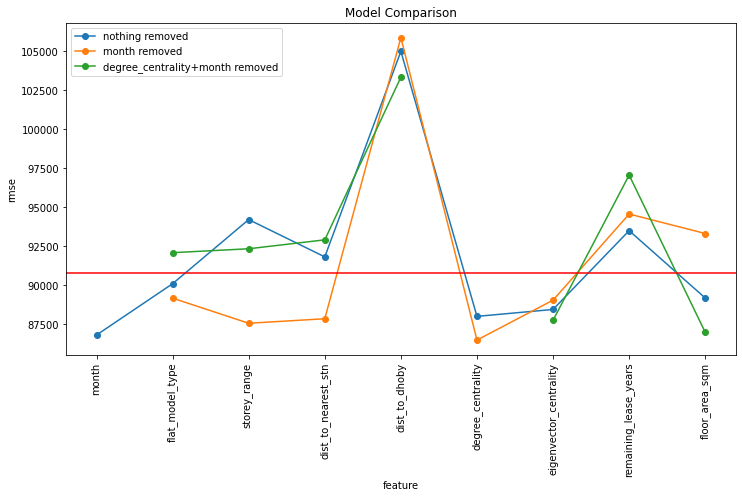

In [47]:
plt.figure(figsize=(12, 6), dpi=72)
for _ in new_all_losses:
    plt.plot(_, marker='o')
plt.axhline(y=val_rmse_per_epoch[-1], color='r', linestyle='-') # val_rmse of the last epoch from 2d
plt.title('Model Comparison')
plt.ylabel('rmse')
plt.xlabel('feature')
plt.xticks(range(len(feature_names)), feature_names, rotation='vertical')
plt.legend(legend, loc='upper left')
plt.show()

The best feature subset is flat_model_type, storey_range, dist_to_nearest_stn, dist_to_dhoby, eigenvector_centrality, remaining_lease_years and floor_area_sqm.

### e) 

RFE on the 'new test set' eliminated features degree_centrality and month and showed that dist_to_dhoby and remaining_lease_years are crucial. 

Concept drift has occured. Both old test set and new test set has the same features eliminated and dist_to_dhoby as a crucial feature. However, model performance significantly dipped on the new test set compared to the old test set. While there are changes in the feature distribution as indicated by remaining_lease_years becoming a crucial feature (that may have led to the drop in performance), the conditional distribution of the resale price given a feature also changed. Since most of the features eliminated and highlighted as crucial matched, the predictions given by the model are under similar influences. Thus, the dip in R2 shows that predictions no longer matched the actual. Hence, conditional distribution of the resale price given a feature changed and concept drift has occured.

### Conclusion

From Part B, I learned that the learning rate of Adam needs tuning to achieve effective convergence. I learned about Embedding and RandomSearch and also the 3 types of data distribution shifts: Covariate shift, Label shift and Concept drift. Embedding introduces more trainable parameters to the model and RandomSearch trains the model on random set of parameters. 

An alternative to RandomSearch is GridSearch. GridSearch, like RandomSearch, is an uninformed search method. GridSearch exhaustively searches for the best set of parameters whereas RandomSearch searches for a specific number of hyperparameters at random. Compared to RandomSearch, GridSearch is guaranteed to return with the best hyperparameters. However, GridSearch has more iterations than RandomSearch and an increase in size of the hyperparameter search space leads to an exponential rise in runtime and computation. 

Depending on the scenario, the ideal approach of model tuning also differs. If the computational demand and runtime are not constraining factors then GridSearch is favored. If sacrifices on performance to achieve shorter runtime is acceptable then RandomSearch is suitable.

Other alternatives to RandomSearch are BayesianOptimisation and Hyperband. BayesianOptimisation is an informed search method using Gaussian process. BayesianOptimisation moniters past evaluation results to build a probalistic model of the objective function. Hyperparameters are mapped to a proability score. The probalistic model is called a "surrogate" for the objective function and is easier to optimise. The set of hyperparameters that performed best on the surrogate function is selected to evaluate on the objective function. Using the evaluation result, the surrogate model is updated and this process repeats till max iterations or time is reached. 

Compared to RandomSearch, BayesianOptimisation is more reliable. Although both RandomSearch and BayesianOptimisation are able to return the best hyperparameters without exploring the entire sample space, BayesianOptimisation do not have to incorporate randomness and risk missing the optimal hyperparameters. Ideally, BayesianOptimisation can find optimal hyperparameters in less time compared to GridSearch due to fewer trials. However, additional time is required by BayesianOptimisation to determine the next hyperparameters to evaluate based on past results. If fewer iterations but longer runtimes is acceptable then BayesianOptimisation is suitable.